In [36]:
# IMporting librariies
import pandas as pd # for data analysis
import numpy as np # for numerical calculations & dealing with vectors and matrices
import seaborn as sns # visualization
from matplotlib import pyplot as plt # for visualization

In [5]:
df=pd.read_csv("netflix.csv")

In [20]:
# data understanding
df.head(5) # gives the top 5 rows 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.shape

(8807, 12)

In [16]:
df.size

105684

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
# statistical info about the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [28]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [47]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
df["show_id"].unique() # unique values of unnamed 

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

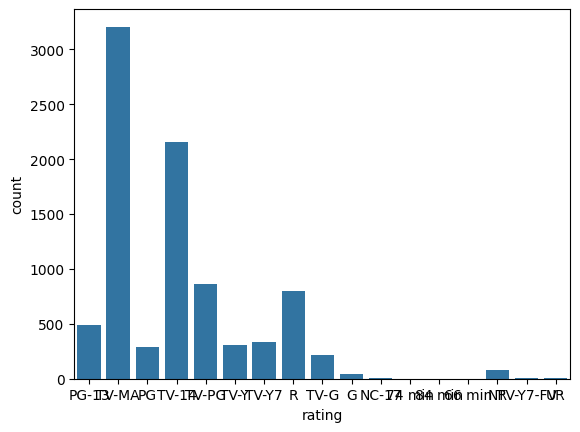

In [60]:
# univariate analsis
# sns.countplot(x=df['type'])
sns.countplot(x=df['rating'])

In [40]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [44]:
df[df.duplicated()] # gives us the duplicate values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# categorical

In [66]:
# Printing the complete information of the dataset and names of the columns that has missing values.
print(df.info())

# Identify columns with missing values and display statistics
df.columns[df.isnull().any()]
df[missing_columns].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

In [54]:
missing_stats # shows missing value columns and count of missing values

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

# DATA CLEANING

In [99]:
# droping unnecessary columns
df.drop(columns=['director'],axis=1,inplace=True)

- director      2634
- cast           825
- country        831
- date_added      10
- rating           4
- duration         3

In [65]:
# Print the top 10 countries contributing to the Content on Netflix
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [82]:
# listing the 5 most popular types of genre on the platform.
df['listed_in'].value_counts().head(5)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64

In [96]:
# - Loading the Dataset and categorize into TV shows and Movies and display 2 rows for each.
df[df['type']=='Movie'].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [97]:
df[df['type']=='TV Show'].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
# - Load the Dataset and find the Oldest movies


In [ ]:
- Load the Dataset and get the count of values for duration column.

In [ ]:
- Load the Dataset and find the measures of central tendency and dispersion of duration column by extracting  numerical part of the duration column.

In [ ]:
- Load the Dataset and find out to which country the highest duration movie belongs to by extracting the numerical part of the duration column and create a new column. print title and country column.

In [ ]:
- Load the Dataset and plot the histogram  on Netflix Content Release Year Distribution.

In [ ]:
- Load the Dataset and plot the Distribution of Populartiy of different content categories using countplot